# Bernoulli, entropy and spamlet  Physics 481 Week 2

In [2]:
# load modules for math and plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Probability

A random Bernoulli (binary) process has only two possible outcomes; these are often labelled as True/False or 0/1.
One well-known example of such a process is flipping a coin to obtain either heads (H) or tails (T).
The probability of getting a given outcome $i$ is usually represented as $p_i$.  By definition,
the total probability of all possible outcomes must add up to one

 $$ \sum p_i = p_H + p_T = 1 $$

In other words: only one outcome can occur, and one outcome must occur.  

For a perfectly "fair" coin the probabilities are equal

 $$ p_H = p_T = 0.5 $$

## numpy.random

Many useful tools for generating random numbers are located in the "numpy.random" module.  This can be loaded independently

      import numpy.random as nprand
    
or used as part of numpy.  For example, we can produce 9 random numbers that should be distributed uniformly between 0 (inclusive) and 1.0 (exclusive).

In [3]:
# Create an array of the given shape and populate it with random samples 
# from a uniform distribution over [0, 1).
np.random.rand(9)

array([ 0.07901179,  0.94787266,  0.02443968,  0.09997122,  0.27295941,
        0.09468385,  0.88549769,  0.58218985,  0.99814214])

In principle, any other distribution (ie. binomial, Gaussian) can be simulated by starting with a uniform distribution and applying an appropriate transformation of variables.  The numpy.random module also includes many convenient routines for obtaining random numbers from many useful distributions.   Although the Bernoulli distribution is not provided explicitly, there are several methods which can be used to produce binary random numbers.

One approach is to start with floating point uniform random values and map them onto 0 and 1 as follows

In [4]:
print( np.random.rand(9) > 0.5 )

[False  True  True False  True False  True  True  True]


### Discussion
Should we instead use a slightly different comparison operator?

In [5]:
print( np.random.rand(9) >= 0.5 )

[ True False False False False False False False  True]


Another approach is to use the "randint" function.  Remember that information about python modules and functions can be found in several different ways eg.

    help(numpy.randint)
    ?(numpy.randint)
    dir(numpy.randint)

        Help on package numpy.random in numpy:

        NAME
            numpy.random

        DESCRIPTION
            ========================
            Random Number Generation
            ========================

In [6]:
#Return random integers from `low` (inclusive) to `high` (exclusive).

# Calling "randint" with low=0 and high=1 does not produce a random
# sequence of 1's and 0's.
#
print( np.random.randint(low=0, high=1, size=9 ), '<==== only zeros' )

# Instead, the function is written to follow the python convention
# where the upper limit is excluded.
#
print( np.random.randint(low=0, high=2, size=9 ) )

#
#
print( np.random.randint(2, size=9 ) )

[0 0 0 0 0 0 0 0 0] <==== only zeros
[1 1 1 1 0 0 1 1 1]
[1 0 1 1 1 0 1 1 0]


I think a case could be made that this calling convention violates the "Principle of Least Astonishment"

      https://en.wikipedia.org/wiki/Principle_of_least_astonishment

which is basically that a system should behave in a manner consistent with how users are likely to expect it to behave; that is, users should not be astonished at the way it behaves.

On the other hand, one could also argue that the exclusive upper bound is very pythonic.  Also note that other languages also use the exclusive upper bound ie.

      https://stackoverflow.com/questions/363681/how-do-i-generate-random-integers-within-a-specific-range-in-java?rq=1


In Java 1.7 or later, the standard way to do this is as follows:

import java.util.concurrent.ThreadLocalRandom;

    // nextInt is normally exclusive of the top value,
    // so add 1 to make it inclusive
    int randomNum = ThreadLocalRandom.current().nextInt(min, max + 1);

Conclusion: ensure that your expectations are consistent with your tools.

Note: There is a numpy.random.random_integers function that behaves the other way.  Sadly, it appears to be deprecated and may not be supported in future versions of numpy.

In [8]:
# Return random integers of type np.int from the “discrete uniform” distribution in the closed interval [low, high]
print( np.random.random_integers(low=0, high=1, size=9 ) )

[1 1 1 1 0 1 1 1 0]


C:\Users\David\Miniconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  


Perhaps the best alternative is provided by numpy.random.choice which has a clear calling convention and can be used for more general applications.

In [10]:
print( np.random.choice([0,1], size=9, p=[0.5, 0.5] ) )
print( np.random.choice(['yes', 'maybe', 'no'], size=9, p=[0.25, 0.5, 0.25] ) )

[1 0 1 0 1 1 0 0 1]
['maybe' 'yes' 'no' 'maybe' 'maybe' 'no' 'yes' 'no' 'maybe']


## Entropy and Information

A sequence of numbers may be considered random if each successive observation is ``surprising'' or communicates additional information beyond what the previous ones provided.  After seeing the first few symbols (values) in this sequence
 $$\{0,0,0,0,0,0,0,0 \ldots\}$$
we can easily guess the next one, but this sequence
 $$\{0,1,0,0,1,1,0,1 \ldots\}$$
is apparently unpredictable.

A quantitative definition of entropy introduced by Shannon[1948]
$$  H = -\sum_{i=1}^n p_i \; log{p_i} $$
has a familiar physical analog in statistical mechanics and allows us to determine the maximum amount of information that can be transmitted over a noisy digital communication channel.



### Gibbs entropy formula

    https://en.wikipedia.org/wiki/Entropy_(statistical_thermodynamics)
    
The macroscopic state of a system is characterized by a distribution on the microstates. The entropy of this distribution is given by the Gibbs entropy formula, named after J. Willard Gibbs. For a classical system (i.e., a collection of classical particles) with a discrete set of microstates, if $E_{i}$ is the energy of microstate i, and $p_{i}$ is the probability that it occurs during the system's fluctuations, then the entropy of the system is

$$S=-k_{{\text{B}}}\,\sum _{i}p_{i}\ln \,p_{i}$$

This S is almost universally called simply the entropy. It can also be called the statistical entropy or the thermodynamic entropy without changing the meaning. Note the above expression of the statistical entropy is a discretized version of Shannon entropy. The von Neumann entropy formula is an extension of the Gibbs entropy formula to the quantum mechanical case.

The logarithm is often taken with base 2
$$  H = -\sum_{i=1}^n p_i \; log_2{p_i} = -1/\ln 2 \,\sum_{i=1}^n p_i \; ln{p_i} $$
to produce a result in terms of bits per symbol. Some properties of the entropy are

1) $H(p_1,\ldots,p_N)$ is a concave function of the $p_i$. 

2) for a given $N$, the uniform distribution $p_i=1/N$ has the maximum entropy $H$. 

3) $H(p_1,\ldots,p_N)$ is zero if and only if one of the $p_i=1$.  In other words, if there is only one possible outcome then there is no new information provided by observing that event. 


A Bernoulli (binary) process has two discrete outcomes (eg. true and false) that occur with probability $p$ and $q=1-p$.  The entropy of this process

$$  H(p) = -p\,\log(p) - q\,\log(q) = -p\,\log(p) - (1-p)\,\log(1-p) $$
has a maximum of 1 bit per outcome

 $$  {{\partial H(p)}\over{\partial p}} = -\left[ \log p + {p \over p} - \log(1-p) - {{1-p}\over{1-p}} \right] 
  = -\log p + \log(1-p) = 0 $$

$$  \exp\left(\log p\right) = \exp\left(\log(1-p)\right)  \qquad\Rightarrow\qquad p=1-p $$

at $p=q=0.5$ where the outcome of this system is least predictable.  As shown in the following example the entropy is zero at the endpoints $p=q=0$ where the outcome is totally predictable.

C:\Users\David\Miniconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\David\Miniconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


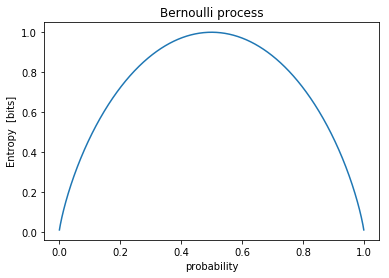

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
p = np.arange(0.00, 1.00, 0.001)
H = -p*np.log(p) - (1-p)*np.log(1-p)
plt.plot(p,H/np.log(2.0))
plt.xlabel('probability')
plt.ylabel('Entropy  [bits]')
plt.title('Bernoulli process')

## Monkey Shakespeare

<img src="http://static02.mediaite.com/themarysue/uploads//2014/04/19580483_af3de93fca_o.jpg">

https://en.wikipedia.org/wiki/Infinite_monkey_theorem

The infinite monkey theorem states that a monkey hitting keys at random on a typewriter keyboard for an infinite amount of time will almost surely type a given text, such as the complete works of William Shakespeare. In fact the monkey would almost surely type every possible finite text an infinite number of times. However, the probability of a universe full of monkeys typing a complete work such as Shakespeare's Hamlet is so tiny that the chance of it occurring during a period of time hundreds of thousands of orders of magnitude longer than the age of the universe is extremely low (but technically not zero).

In this context, "almost surely" is a mathematical term with a precise meaning, and the "monkey" is not an actual monkey, but a metaphor for an abstract device that produces an endless random sequence of letters and symbols. One of the earliest instances of the use of the "monkey metaphor" is that of French mathematician Émile Borel in 1913,[1] but the first instance may be even earlier.

Variants of the theorem include multiple and even infinitely many typists, and the target text varies between an entire library and a single sentence. Jorge Luis Borges traced the history of this idea from Aristotle's On Generation and Corruption and Cicero's De natura deorum (On the Nature of the Gods), through Blaise Pascal and Jonathan Swift, up to modern statements with their iconic simians and typewriters. In the early 20th century, Borel and Arthur Eddington used the theorem to illustrate the timescales implicit in the foundations of statistical mechanics.


<img src="http://minnov8.com/site/wp-content/uploads/2013/11/monkey-cartoon.jpg">

In [12]:
# Start with the classic quote,
#
full_quote = 'To be, or not to be? That is the question—'
print('Full quote: ',full_quote)

# Simplify by stripping punctuation and converting to lower case.
charlist = [c.lower() for c in full_quote if c.isalpha() or c==' ']
print('Simplified quote: ', ''.join(charlist) )
print('Length of simplified quote: ', len(charlist) )

# Get a list of the unique characters along with "lookup" index
# where each element points to the corresponding unique character.
#
uchars, uindx, ucounts= np.unique(charlist, return_inverse=True, return_counts=True)
print('Unique characters: ', ''.join( uchars ) )
print('Number of unique characters: ', len(uchars) )

print('Number of 13 character combinations of 27 characters: ', 27**13)
print('Probability of typing "to be..." at random: ', 27**-13)

"""
What is the entropy (in bits per symbol) for a uniform 27-key typewriter?
"""
p27 = 1.0/27.0 * np.ones(27)
print('Entropy [bits per key]', -np.sum(np.log(p27) * p27 )/ np.log(2) )

Full quote:  To be, or not to be? That is the question—
Simplified quote:  to be or not to be that is the question
Length of simplified quote:  39
Unique characters:   abehinoqrstu
Number of unique characters:  13
Number of 13 character combinations of 27 characters:  4052555153018976267
Probability of typing "to be..." at random:  2.4675790019909876e-19
Entropy [bits per key] 4.75488750216


In [13]:
# So how long will it take a monkey to type Hamlet?

# Don't pull the same file every time!
#
import urllib.request
url = 'http://www.gutenberg.org/cache/epub/1524/pg1524.txt'
bytedata = urllib.request.urlopen( url ).read()

# Get a local copy with browser or "wget" command.

In [14]:
# Note that the file contains a preamble about the text (metadata).
# A more careful analysis might remove all this, but for simplicity 
# we will ignore this detail.
#
print( bytedata[3:99].decode('ascii') )

Project Gutenberg Etext of Hamlet by Shakespeare
PG has multiple editions of William Shakespear


In [15]:
# Change bytes to characters
# +ignore the first 4 "magic" bytes (file type)
# +ignore everything except a-z and spaces
# +change all letters to lower case
data = bytedata[4:].decode('ascii')
charlist = [c.lower() for c in data if c.isalpha() or c==' ']
print('Length of simplified Hamlet: ', len(charlist) )

# This is one way to count how many times each letter occurs.
# Using numpy might be faster, but this is easy to understand.
#
catalog = {}
for symbol in charlist:
    
    if symbol in catalog:
        catalog[symbol] += 1  #increment
    else:
        catalog[symbol] = 1  # initialize
        
print( catalog ) 

Length of simplified Hamlet:  167664
{'r': 8381, 'o': 11985, 'j': 150, 'e': 16138, 'c': 2906, 't': 12707, ' ': 28805, 'g': 2608, 'u': 4617, 'n': 8864, 'b': 1971, 'x': 270, 'f': 2889, 'h': 8988, 'a': 10513, 'm': 4487, 'l': 6195, 'y': 3437, 's': 8840, 'k': 1315, 'p': 2251, 'i': 9141, 'd': 5358, 'w': 3239, 'v': 1302, 'z': 78, 'q': 229}


### Question: what is the entropy of "simplified Hamlet" (Spamlet)?
    
### Question: what is the probability that a monkey with a uniform random selection of 27-keys would produce Spamlet?  In other words, how many different sequences with 167664 characters are there?

### Question: how does the probability change if the chance of hitting any given key was not 1/27, but the same as the distribution of Spamlet?

### Optional: determine the joint probability of each 2-key sequence eg. 'aa', 'ab', 'ac' from Spamlet.  How does the probability of producing Spamlet change if the monkey hits keys according to this distribution?

### Optional: write a program to generate sequences of text that sound somewhat like Shakespeare.  See for inspiration http://www.elsewhere.org/journal/pomo/ 

In [29]:
import time
import numpy as np

# Q1

Probability of occurences of letters are simply extracted from the 'catalog' dictionary above. 
First I check that its length is 27. Ohterwise I need to assign a value of 0 to missing keys (lettess)

In [30]:
assert len(catalog)==27

Then simply apply 
$$  H = -\sum_{i=1}^n p_i \; log{p_i} $$

In [39]:
#Entropy H
H=0.0

begin=time.time()

for i in charlist:
    p=catalog[i]/len(charlist)
    H+=-p*np.log(p)/(np.log(2))

end=time.time()

print("Entropy of Spamlet: ",H)
print("time taken: ",end-begin," seconds")


Entropy of Spamlet:  42498.5737891
time taken:  0.41545772552490234  seconds


It can alternatively written in a much more timely efficient, 'pythonic' way

In [140]:
len(charlist)

167664

In [40]:
#Entropy H
H=0.0

begin=time.time()

for i in catalog:
    p=catalog[i]/len(charlist)*np.ones(catalog[i])
    H+=-np.sum(np.log(p)*p)/(np.log(2))

end=time.time()

print("Entropy of Spamlet: ",H)
print("time taken: ",end-begin," seconds")

Entropy of Spamlet:  42498.5737892
time taken:  0.003504514694213867  seconds


# Q2


Given the uniform distribution, the probability $P_u$ would be
$$P_u=\left(\frac{1}{27}\right)^{167664}$$

It's apparaent that this would approach 0 very rapidly:

In [141]:
for i in np.arange(0,300)[::20]:
    a=(1/27)**i
    print("(1/27) to the power of ",i," = ",a)

(1/27) to the power of  0  =  1.0
(1/27) to the power of  20  =  2.35898248759e-29
(1/27) to the power of  40  =  5.56479837677e-58
(1/27) to the power of  60  =  1.31272619178e-86
(1/27) to the power of  80  =  3.09669809741e-115
(1/27) to the power of  100  =  7.30505658115e-144
(1/27) to the power of  120  =  1.72325005458e-172
(1/27) to the power of  140  =  4.0651167005e-201
(1/27) to the power of  160  =  9.58953910649e-230
(1/27) to the power of  180  =  2.26215548163e-258
(1/27) to the power of  200  =  5.33638516538e-287
(1/27) to the power of  220  =  1.25884391521e-315
(1/27) to the power of  240  =  0.0
(1/27) to the power of  260  =  0.0
(1/27) to the power of  280  =  0.0


Usually, Python gives up on displaying small floats after around $10^{-300}$

So its' clear that there is a limit on how much Python can handle float. However, Python does not have a limit on how high it can go up in integer as long as RAM permits it. So I define
$$PR_u:=P_u^{-1}=27^{167664}$$

Simply displaying the number gives a wall of numbers. So while that confirms Python can handle very very very large integers, it has way too much entropy for us humans to handle. So I count its length to write in scientific notation.

In [142]:
PR_n=str(27**len(charlist))
length=len(PR_n)
print("PR_n= ",PR_n[0]+"."+PR_n[1]+PR_n[2],"*10^",length-1)

PR_n=  1.49 *10^ 239988


So the probability of typing Spamlet is simply an inverse of $PR_n$

# Q3

Define the probability of typing according to the distribution as $P_d$:
$$P_d=\prod_{i=0}^{167774-1}p_i$$
where $p_i$ are probability of occurence of $i^{th}$ letter.

This can alternatively be written as
$$P_d=\prod_{l=0}^{27-1}\prod_{n=0}^{n_l}p_l$$

where $p_l$ is the probability of occurence of $l^{th}$ latin letter and $n_l$ is the number of $l^{th}$ present in the Spamlet

Similar to $Q2$, the float $P_d$ approaches 0 too quickly for Python to handle. So I define
$$PR_d=P_d^{-1}$$ and work with integers.

In [192]:
PR_d=1
up=1
down=1
for l in catalog:
    for n in range(catalog[l]):
        up=up*len(charlist)
        down=down*catalog[l]

In [144]:
PR_d_r=str(up%down)
PR_d_app=str(up//down)

L_PR_d_r=len(PR_d_r)
L_PR_d_app=len(PR_d_app)

In [145]:
print(PR_d_app[0]+"."+PR_d_app[1:3],"10^",L_PR_d_app-1)

4.13 10^ 208633


AttributeError: module 'numpy' has no attribute 'randint'

# Optional Q4

Defined joint probability denoted by dictionary
$JP: (x,y)\rightarrow \mathbb{R}$

note that the ordered pair (x,y) is commutative, and either key will work

In [185]:
JC={}
for i in range(0,len(charlist)-1,1):
    jc=charlist[i]+charlist[i+1]
    if jc in JC:
        JC[jc]+=1
    else:
        JC[jc]=1
        
#print(JC)
JC_length=0
for i in JC:
    JC_length+=JC[i]

In [150]:
JC_length*2

167664

In [187]:
up=1
down=1
for i in range(0,len(charlist),2):
    jc=charlist[i]+charlist[i+1]
    up=up*len(charlist)
    down=down*JC[jc]

In [188]:
PJ=str(up//down)
L_PJ=len(str(up//down))

In [189]:
print(PJ[0]+"."+PJ[1:3],"10^",L_PJ-1)

4.04 10^ 191651


In [266]:
def isbitset(sequence,setbit=4):
    bitmask=2**setbit
    
    return (sequence&bitmask)!=0

In [248]:



isbitset(np.array([0,2,1,4,7]),setbit=1)

array([False,  True, False, False,  True], dtype=bool)

In [270]:
z=[]
for i in range(20):
    z.append(np.random.randint(0,10))

In [272]:
isbitset(np.array(z),setbit=4)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False], dtype=bool)

In [5]:
def unix_rand(seed=None):
    
    unix_rand.seed = unix_rand.seed if seed is None else seed
    if unix_rand.seed is None:
        unix_rand.seed = 0
    
    multval, addval, maxval = 1103515245, 12345, 2**31
    unix_rand.seed = (multval * unix_rand.seed + addval) % maxval
    
    return unix_rand.seed

print( unix_rand(0) )
print( unix_rand() )
print( unix_rand() )

12345
1406932606
654583775


In [277]:
for i in range(0,17):
    print(isbitset(np.array(z),setbit=i))
    print("")
    

[ True False False  True  True  True  True  True False  True  True  True
  True  True False  True  True False  True False]

[ True False  True  True False False False  True  True  True False  True
 False  True False False  True False  True False]

[False  True False False False False False False  True  True  True  True
  True False False  True False False  True False]

[False False False False  True  True  True False False False False False
 False False False False False False False False]

[False False False False False False False False False False False False
 False False False False False False False False]

[False False False False False False False False False False False False
 False False False False False False False False]

[False False False False False False False False False False False False
 False False False False False False False False]

[False False False False False False False False False False False False
 False False False False False False False False]

[False F

In [278]:
z = [unix_rand(seed=0)]
for i in range(5):
    z.append(unix_rand() )
    
for i in range(0,17):
    print(isbitset(np.array(z),setbit=i))
    print("")
    

[ True False  True False  True False]

[False  True  True False False  True]

[False  True  True  True  True False]

[ True  True  True  True False  True]

[ True  True  True False  True False]

[ True  True False  True  True False]

[False  True  True False  True False]

[False False  True False  True  True]

[False False  True False False False]

[False  True  True False  True False]

[False  True  True  True  True  True]

[False False False  True False  True]

[ True  True False  True  True  True]

[ True False  True False False False]

[False False False False False False]

[False False False False  True False]

[False False False  True False  True]

